In [1]:
using PyPlot
using Dierckx
using PiecewiseInterpolation

Define function with first order discontinuity.
\begin{equation}
f(t) = \mathrm{e}^{-10|t|}
\end{equation}

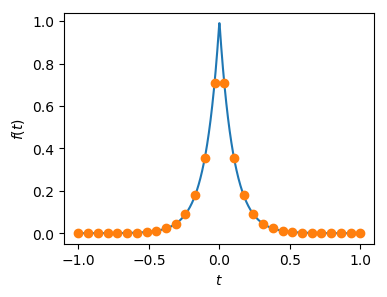

PyObject <matplotlib.text.Text object at 0x7fd64cc05828>

In [16]:
f = t -> exp(-10abs(t))
t = linspace(-1, 1, 1000)
figure(figsize=(4, 3))
plot(t, f.(t))
times = collect(linspace(-1, 1, 30))
values = f.(times)
plot(times, values, "o", label="input data")
xlabel(L"t")
ylabel(L"f(t)")

Create naive and piecewise spline (with a single discontinuity at $t=0$):

In [18]:
ff = Spline1D(times, values, k=3)
p = PiecewiseSpline1D(times, values, [0.0])
;

Comparison of exact function, input data, and both interpolations.

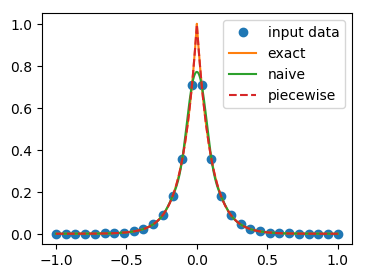

PyObject <matplotlib.legend.Legend object at 0x7fd64cc48ef0>

In [19]:
figure(figsize=(4, 3))
plot(times, values, "o", label="input data")
new_times = linspace(-1, 1, 1001)
plot(new_times, f.(new_times), label="exact")
plot(new_times, ff.(new_times), label="naive")
plot(new_times, p.(new_times), "--", label="piecewise")
legend()

Absolute errors of both interpolations (vs exact function).

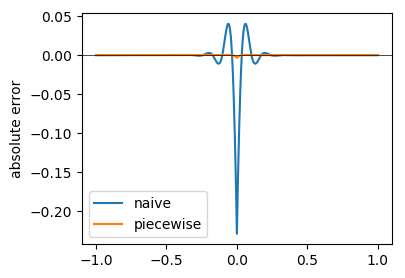

PyObject <matplotlib.lines.Line2D object at 0x7fd64caad898>

In [20]:
figure(figsize=(4, 3))
plot(new_times, ff.(new_times) - f.(new_times), label="naive")
plot(new_times, p.(new_times) - f.(new_times), label="piecewise")
ylabel("absolute error")
legend()
axhline(0.0, color="k", lw=0.5)

Relative errors of both interpolations (vs exact function).

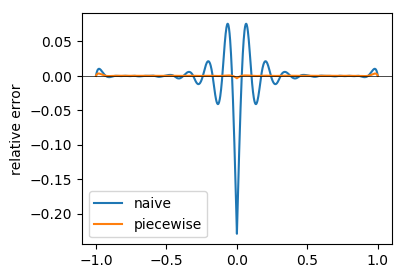

PyObject <matplotlib.lines.Line2D object at 0x7fd64c9f3c50>

In [22]:
figure(figsize=(4, 3))
plot(new_times, (ff.(new_times) - f.(new_times)) ./ f.(new_times), label="naive")
plot(new_times, (p.(new_times) - f.(new_times)) ./ f.(new_times), label="piecewise")
ylabel("relative error")
legend()
axhline(0.0, color="k", lw=0.5)